# Lecture 1 November 2024

In [2]:
import tensorflow as tf
import keras as keras


## 3.6 Predicting house prices: a regression example

In [32]:
# loading the boston housing dataset
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [30]:
import pandas as pd
train_data_df = pd.DataFrame(train_data)
train_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [33]:
train_data.mean(axis=0)

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [35]:
# feature wise normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std
train_data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [36]:
# build nn
from keras import models
from keras import layers

def regression_model():
    model = models.Sequential()
    model.add(layers.Dense(50, activation = 'relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(50, activation = 'relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics = ['mean_absolute_error'])
    return model

In [ ]:
# validating approach using k-fold CV
import numpy as np

k = 3
print(len(train_data)) # 404
num_val_n = len(train_data) // k # integer division (404/3 = 134.6667 -> rounds down to 134... ceiling)
print(num_val_n)

num_epochs = 100
all_scores = []

for i in range(k):
    print("processing fold #", i)
    # prepares the validation data: data from partition #k
    val_data = train_data[i * num_val_n: (i+1) * num_val_n]
    val_targets = train_targets[i * num_val_n: (i + 1) * num_val_n]

    partial_train_data = np.concatenate([train_data[:i * num_val_n], train_data[(i + 1) * num_val_n:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_n], train_targets[(i + 1) * num_val_n:]], axis=0)


    model = regression_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1) # , verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_targets) #, verbose=0)
    all_scores.append(val_mae)
    print("processing fold end #", i)

404
134
processing fold # 0
Epoch 1/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 417.5904 - mean_absolute_error: 17.8944
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 61.2512 - mean_absolute_error: 5.2291
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.8293 - mean_absolute_error: 3.6493
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.8951 - mean_absolute_error: 2.9976
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.6313 - mean_absolute_error: 2.4476
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.5187 - mean_absolute_error: 2.8729
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.9388 - mean_absolute_error: 2.7226
Epoch 8/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.4920 - mean_absolute_error: 2.6575
Epoch 9/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7022 - mean_absolute_error: 1.9956
Epoch 10/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.6428 - mean_abs

In [42]:
print(all_scores)
print(np.mean(all_scores))
print(np.std(all_scores))

[2.281583070755005, 2.7882580757141113, 2.646226167678833]
2.5720224380493164
0.21340030503067145


In [43]:

import numpy as np

num_epochs = 200
all_scores = []
all_mae_history = []

for i in range(k):
    print("processing fold #", i)
    # prepares the validation data: data from partition #k
    val_data = train_data[i * num_val_n: (i+1) * num_val_n]
    val_targets = train_targets[i * num_val_n: (i + 1) * num_val_n]

    partial_train_data = np.concatenate([train_data[:i * num_val_n], train_data[(i + 1) * num_val_n:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_n], train_targets[(i + 1) * num_val_n:]], axis=0)


    model = regression_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets),
                          epochs=num_epochs, batch_size=1) # , verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_history.append(mae_history)

    # val_mse, val_mae = model.evaluate(val_data, val_targets) #, verbose=0)
    #all_scores.append(val_mae)
    print("processing fold end #", i)

processing fold # 0
Epoch 1/200


c:\Users\ntlmp\AppData\Local\R-MINI~1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 416.0765 - mean_absolute_error: 18.1760 - val_loss: 49.4169 - val_mean_absolute_error: 4.6521
Epoch 2/200
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36.2213 - mean_absolute_error: 4.3890 - val_loss: 28.9070 - val_mean_absolute_error: 3.6369
Epoch 3/200
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.9883 - mean_absolute_error: 3.7471 - val_loss: 24.6447 - val_mean_absolute_error: 3.3584
Epoch 4/200
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.4293 - mean_absolute_error: 3.4920 - val_loss: 19.0431 - val_mean_absolute_error: 2.8978
Epoch 5/200
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.5115 - mean_absolute_error: 2.8024 - val_loss: 18.3420 - val_mean_absolute_error: 3.0085
Epoch 6/200
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.1229 - mean_absolute_error: 3.0652 - val_loss: 15.0308 - val_mean_absolute_error: 2.6678
Epoch 7/200
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.6423 - mean_absolute_error: 

In [44]:
avg_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

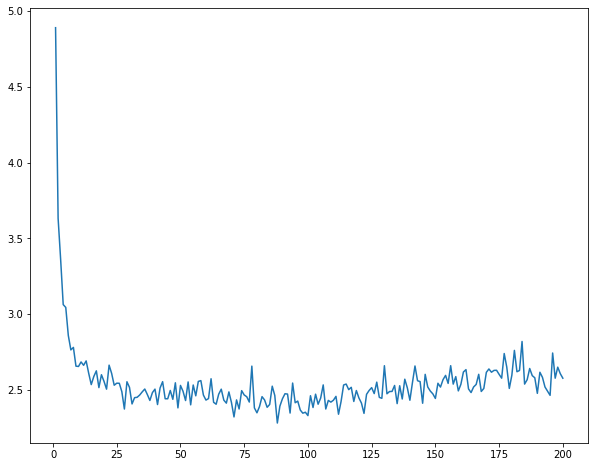

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(avg_mae_history)+1), avg_mae_history)
plt.show()

In [53]:
def smooth_curve(points, factor=.9):
    smoothed_points = [] # initialize array
    for point in points: # iterates over each point in the points list
        if smoothed_points: # checks whether smoothed_points already contains any value
            # if it does
            previous = smoothed_points[-1] # retrieves the last smoothed value
            smoothed_points.append(previous * factor + point * (1 - factor)) # 90% of weight to the previous
        else: # if not (i.e. the list is empty), it simply appends the first point
            smoothed_points.append(point)
    return smoothed_points

In [55]:
smooth_mae_history = smooth_curve(avg_mae_history[10:])

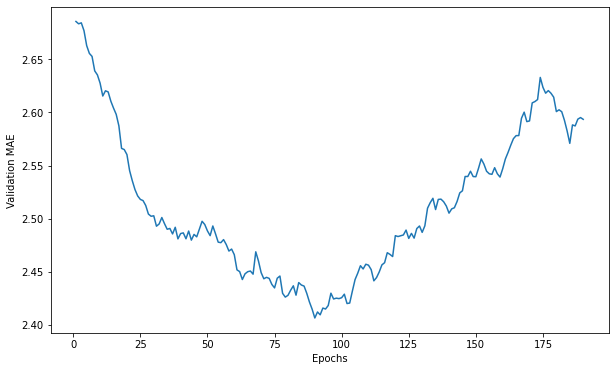

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [59]:
model = regression_model()

model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

c:\Users\ntlmp\AppData\Local\R-MINI~1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.3433 - mean_absolute_error: 2.5419 
2.7212023735046387


# 4.4.2 Adding weight regularization


In [61]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [63]:
X = data.data
y = data.target

print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=479)

In [66]:
# normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # fit transform will compute the mean and stdev.. transform is different...

In [70]:
from tensorflow.keras.regularizers import l1_l2

def build_model_with_elasticnet():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                     kernel_regularizer=l1_l2(l1=0.001, l2=0.001)), # elastic net regularization
        layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
        layers.Dense(1, activation='linear') # output layer for regression (predicting a continuous target)
    ])

    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])
    return model

model = build_model_with_elasticnet()

In [71]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/50
9/9 - 1s - 133ms/step - loss: 28508.1875 - mean_absolute_error: 150.4394 - val_loss: 33516.6055 - val_mean_absolute_error: 165.9440
Epoch 2/50
9/9 - 0s - 14ms/step - loss: 28245.7285 - mean_absolute_error: 149.5657 - val_loss: 33199.4609 - val_mean_absolute_error: 165.0202
Epoch 3/50
9/9 - 0s - 7ms/step - loss: 27929.2148 - mean_absolute_error: 148.5119 - val_loss: 32800.8398 - val_mean_absolute_error: 163.8605
Epoch 4/50
9/9 - 0s - 8ms/step - loss: 27509.2930 - mean_absolute_error: 147.1402 - val_loss: 32285.2109 - val_mean_absolute_error: 162.3424
Epoch 5/50
9/9 - 0s - 8ms/step - loss: 26981.3203 - mean_absolute_error: 145.3562 - val_loss: 31585.3516 - val_mean_absolute_error: 160.2870
Epoch 6/50
9/9 - 0s - 8ms/step - loss: 26273.9707 - mean_absolute_error: 142.9754 - val_loss: 30663.1719 - val_mean_absolute_error: 157.5527
Epoch 7/50
9/9 - 0s - 9ms/step - loss: 25342.1094 - mean_absolute_error: 139.7783 - val_loss: 29475.4316 - val_mean_absolute_error: 153.9791
Epoch 8/50

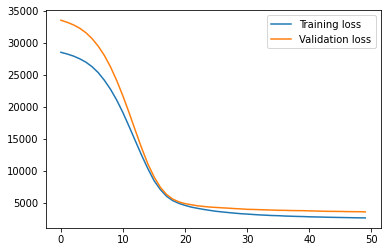

In [72]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [73]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/30
9/9 - 0s - 11ms/step - loss: 2628.2512 - mean_absolute_error: 40.3089 - val_loss: 3583.7544 - val_mean_absolute_error: 47.4183
Epoch 2/30
9/9 - 0s - 7ms/step - loss: 2615.5940 - mean_absolute_error: 40.1947 - val_loss: 3574.6885 - val_mean_absolute_error: 47.4235
Epoch 3/30
9/9 - 0s - 7ms/step - loss: 2600.8950 - mean_absolute_error: 40.0892 - val_loss: 3568.0996 - val_mean_absolute_error: 47.3971
Epoch 4/30
9/9 - 0s - 7ms/step - loss: 2591.4304 - mean_absolute_error: 40.0126 - val_loss: 3569.1387 - val_mean_absolute_error: 47.4359
Epoch 5/30
9/9 - 0s - 12ms/step - loss: 2579.0771 - mean_absolute_error: 39.9150 - val_loss: 3554.9509 - val_mean_absolute_error: 47.4059
Epoch 6/30
9/9 - 0s - 7ms/step - loss: 2564.9290 - mean_absolute_error: 39.8200 - val_loss: 3530.5295 - val_mean_absolute_error: 47.3266
Epoch 7/30
9/9 - 0s - 7ms/step - loss: 2558.1382 - mean_absolute_error: 39.7776 - val_loss: 3526.4417 - val_mean_absolute_error: 47.2987
Epoch 8/30
9/9 - 0s - 7ms/step - loss: 

In [74]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test MAE", test_mae)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3891.4934 - mean_absolute_error: 48.3403 
Test MAE 47.7606201171875


### 4.4.3 Adding dropout

In [81]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target # target (class labels)

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [82]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))
print(y.shape)

(150, 3)


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=479)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
def built_classificationFNN():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                     kernel_regularizer = l1_l2(l1=.001, l2=.001)),
        layers.Dropout(.25),
        layers.Dense(64, activation='relu',
                     kernel_regularizer = l1_l2(l1=.001, l2=.001)),
        layers.Dropout(.25),
        layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [88]:
model = built_classificationFNN()

c:\Users\ntlmp\AppData\Local\R-MINI~1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4707 - loss: 1.6448 - val_accuracy: 0.5417 - val_loss: 1.4400
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5894 - loss: 1.4881 - val_accuracy: 0.7500 - val_loss: 1.2995
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7949 - loss: 1.2956 - val_accuracy: 0.8750 - val_loss: 1.1944
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6799 - loss: 1.2949 - val_accuracy: 0.9167 - val_loss: 1.1098
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7963 - loss: 1.2016 - val_accuracy: 0.8750 - val_loss: 1.0388
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7765 - loss: 1.1680 - val_accuracy: 0.8750 - val_loss: 0.9812
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7887 - loss: 1.0706 - val_accuracy: 0.8750 - val_loss: 0.9327
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8336 - loss: 1.0556 - val_accuracy: 0.8750 - val_loss: 0.

In [91]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.1817
Test accuracy: 1.0


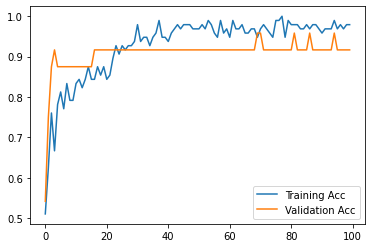

In [93]:
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')
plt.legend()

# FNN for Survival Analysis

In [ ]:
# pip install lifelines tensorflow pandas scikit-learn

In [105]:
# WHAS500 (Heart failure survival data): Western Collaborate Group Study Heart Attack Study with 500 patients
from sksurv.datasets import load_whas500

data

# fix this later...

ModuleNotFoundError: No module named 'sksurv'